In [8]:
# import libraries


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [9]:
# Read the csv file

df=pd.read_csv('/content/drive/MyDrive/data science/projects/project 1/traffic_violaions.csv')

In [10]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [11]:
df.tail()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
52961,10/5/2011,1:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52962,10/5/2011,6:43,NaN,M,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52963,10/5/2011,6:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52964,10/5/2011,7:19,NaN,F,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52965,10/5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# check the information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


In [13]:
#calculate summary statistics

df.describe()

,country_name,driver_age_raw,driver_age
count,0.0,49588.000000,49346.000000
mean,NaN,1965.712229,34.171483
std,NaN,132.195712,12.769907
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,23.000000
50%,NaN,1977.000000,31.000000
75%,NaN,1985.000000,43.000000
max,NaN,8801.000000,88.000000


In [14]:
# column and rows of the data

df.shape

(52966, 15)

# Data  Processing

In [15]:
df.isnull().sum()

,0
stop_date,0
stop_time,1
country_name,52966
driver_gender,3386
driver_age_raw,3378
driver_age,3620
driver_race,3385
violation_raw,3385
violation,3385
search_conducted,1


In [16]:
column=df.columns
column

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [17]:
# drop the country_name and search_type

df.drop(columns=['country_name','search_type','driver_age_raw'],axis=1,inplace=True)

df.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [18]:
# remove null values from driver_gender
df.dropna(subset='driver_gender',inplace=True)

df.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [19]:
df.isnull().sum()

,0
stop_date,0
stop_time,0
driver_gender,0
driver_age,240
driver_race,0
violation_raw,0
violation,0
search_conducted,0
stop_outcome,0
is_arrested,0


In [20]:
# some values missing in driver_age , so we have to fill the value using median
df['driver_age'] = df['driver_age'].fillna(df.groupby('driver_gender')['driver_age'].transform('median'))



In [21]:
df.isnull().sum()

,0
stop_date,0
stop_time,0
driver_gender,0
driver_age,0
driver_race,0
violation_raw,0
violation,0
search_conducted,0
stop_outcome,0
is_arrested,0


In [22]:
df.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [23]:

df.duplicated().any()

True

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().any()

False

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49411 entries, 0 to 52964
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           49411 non-null  object 
 1   stop_time           49411 non-null  object 
 2   driver_gender       49411 non-null  object 
 3   driver_age          49411 non-null  float64
 4   driver_race         49411 non-null  object 
 5   violation_raw       49411 non-null  object 
 6   violation           49411 non-null  object 
 7   search_conducted    49411 non-null  object 
 8   stop_outcome        49411 non-null  object 
 9   is_arrested         49411 non-null  object 
 10  stop_duration       49411 non-null  object 
 11  drugs_related_stop  49411 non-null  object 
dtypes: float64(1), object(11)
memory usage: 4.9+ MB


In [27]:
# after cleaning data

df.shape

(49411, 12)

In [28]:
df.drop(columns=['stop_date'],axis=1,inplace=True)
df.head()

,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [29]:
df.drop(columns=['stop_time','driver_race','violation_raw','stop_outcome','search_conducted','stop_duration'],axis=1,inplace=True)
df.head()

,driver_gender,driver_age,violation,is_arrested,drugs_related_stop
0,M,20.0,Speeding,False,False
1,M,40.0,Speeding,False,False
2,M,33.0,Speeding,False,False
3,M,19.0,Other,True,False
4,F,21.0,Speeding,False,False


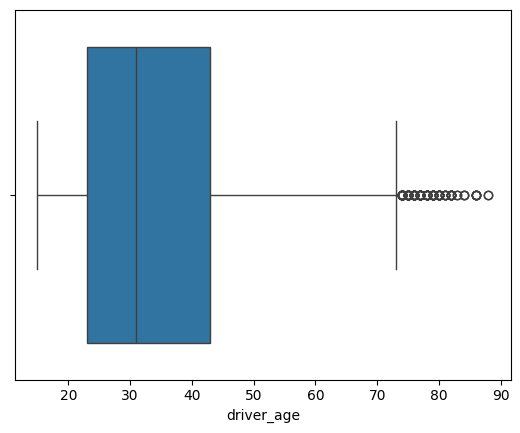

In [30]:
# outlier detecting


sns.boxplot(x=df['driver_age'])
plt.show()

In [31]:
q1=df['driver_age'].quantile(0.25)
q3=df['driver_age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers=df[(df['driver_age']<lower_bound) | (df['driver_age']>upper_bound)]

In [32]:
lower_bound

-7.0

In [33]:
upper_bound

73.0

In [34]:
outliers

,driver_gender,driver_age,violation,is_arrested,drugs_related_stop
725,M,81.0,Speeding,False,False
774,M,76.0,Speeding,False,False
973,M,75.0,Speeding,False,False
1043,M,74.0,Speeding,False,False
1191,M,82.0,Speeding,False,False
...,...,...,...,...,...
52517,M,74.0,Moving violation,False,False
52550,F,76.0,Speeding,False,False
52559,M,75.0,Speeding,False,False
52657,F,84.0,Speeding,False,False


In [35]:
data1=df[(df['driver_age']>=lower_bound) & (df['driver_age']<=upper_bound)]

In [36]:
data1

,driver_gender,driver_age,violation,is_arrested,drugs_related_stop
0,M,20.0,Speeding,False,False
1,M,40.0,Speeding,False,False
2,M,33.0,Speeding,False,False
3,M,19.0,Other,True,False
4,F,21.0,Speeding,False,False
...,...,...,...,...,...
52956,M,32.0,Speeding,True,False
52958,F,44.0,Speeding,False,False
52959,F,20.0,Speeding,False,False
52962,M,25.0,Speeding,False,False


In [37]:
q1=data1['driver_age'].quantile(0.25)
q3=data1['driver_age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers=data1[(data1['driver_age']<lower_bound) | (data1['driver_age']>upper_bound)]

In [38]:
lower_bound

-7.0

In [39]:
upper_bound

73.0

In [40]:
outliers

,driver_gender,driver_age,violation,is_arrested,drugs_related_stop


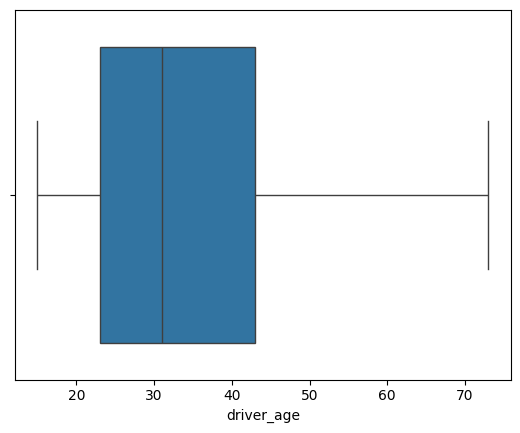

In [41]:
sns.boxplot(x=data1['driver_age'])
plt.show()

In [42]:
# encoding

le=LabelEncoder()
data1['driver_gender']=le.fit_transform(data1['driver_gender'])



<ipython-input-42-f46b4343bbdd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['driver_gender']=le.fit_transform(data1['driver_gender'])


In [43]:
data1.head()

,driver_gender,driver_age,violation,is_arrested,drugs_related_stop
0,1,20.0,Speeding,False,False
1,1,40.0,Speeding,False,False
2,1,33.0,Speeding,False,False
3,1,19.0,Other,True,False
4,0,21.0,Speeding,False,False


In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49258 entries, 0 to 52964
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   driver_gender       49258 non-null  int64  
 1   driver_age          49258 non-null  float64
 2   violation           49258 non-null  object 
 3   is_arrested         49258 non-null  object 
 4   drugs_related_stop  49258 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


In [45]:
# concert the data1 to dataFrame

data1=pd.DataFrame(data1)
data1

,driver_gender,driver_age,violation,is_arrested,drugs_related_stop
0,1,20.0,Speeding,False,False
1,1,40.0,Speeding,False,False
2,1,33.0,Speeding,False,False
3,1,19.0,Other,True,False
4,0,21.0,Speeding,False,False
...,...,...,...,...,...
52956,1,32.0,Speeding,True,False
52958,0,44.0,Speeding,False,False
52959,0,20.0,Speeding,False,False
52962,1,25.0,Speeding,False,False


In [46]:

df_encoded = pd.get_dummies(data1, columns=['is_arrested', 'violation', 'drugs_related_stop'])

In [47]:
df_encoded.head()


,driver_gender,driver_age,is_arrested_False,is_arrested_True,violation_Equipment,violation_Moving violation,violation_Other,violation_Registration/plates,violation_Speeding,drugs_related_stop_False,drugs_related_stop_True
0,1,20.0,True,False,False,False,False,False,True,True,False
1,1,40.0,True,False,False,False,False,False,True,True,False
2,1,33.0,True,False,False,False,False,False,True,True,False
3,1,19.0,False,True,False,False,True,False,False,True,False
4,0,21.0,True,False,False,False,False,False,True,True,False


In [48]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49258 entries, 0 to 52964
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   driver_gender                  49258 non-null  int64  
 1   driver_age                     49258 non-null  float64
 2   is_arrested_False              49258 non-null  bool   
 3   is_arrested_True               49258 non-null  bool   
 4   violation_Equipment            49258 non-null  bool   
 5   violation_Moving violation     49258 non-null  bool   
 6   violation_Other                49258 non-null  bool   
 7   violation_Registration/plates  49258 non-null  bool   
 8   violation_Speeding             49258 non-null  bool   
 9   drugs_related_stop_False       49258 non-null  bool   
 10  drugs_related_stop_True        49258 non-null  bool   
dtypes: bool(9), float64(1), int64(1)
memory usage: 1.6 MB


In [49]:
# split has x and y

x=df_encoded.iloc[:,:-1]

y=df_encoded.iloc[:,-1]


In [50]:
# split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [51]:
print(y_train.value_counts())

drugs_related_stop_True
False    39098
True       308
Name: count, dtype: int64


In [52]:
# smote

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [53]:
# After SMOTE
print(y_train_resampled.value_counts())

drugs_related_stop_True
False    39098
True     39098
Name: count, dtype: int64


#svm - linear

In [54]:

from sklearn import svm
from sklearn.metrics import accuracy_score # Or other relevant metrics


In [55]:
# Choose the appropriate kernel based on your data (linear, rbf, poly, etc.)
clf = svm.SVC(kernel='linear')  # Example with a linear kernel

In [56]:
clf.fit(x_train_resampled, y_train_resampled)  # Fit the model using your training data

SVC(kernel='linear')

In [57]:
y_pred = clf.predict([[1,0,1,0,3,7,6,3,2,9]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([False])

In [58]:
# accuracy score

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


#svm rbf

In [59]:

from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [60]:
# (linear, rbf, poly, etc.)
clf = svm.SVC(kernel='rbf')  # Example with a linear kernel

In [61]:
clf.fit(x_train_resampled, y_train_resampled)  # Fit the model using your training data

SVC()

In [62]:
# accuracy score

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0




#svm - poly

In [63]:

from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [64]:
# (linear, rbf, poly, etc.)
clf = svm.SVC(kernel='poly')  # Example with a linear kernel

In [65]:
clf.fit(x_train_resampled, y_train_resampled)  # Fit the model using your training data

SVC(kernel='poly')

In [66]:
# accuracy score

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


#decision tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred

array([False, False, False, ..., False, False, False])

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [69]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9765
        True       1.00      1.00      1.00        87

    accuracy                           1.00      9852
   macro avg       1.00      1.00      1.00      9852
weighted avg       1.00      1.00      1.00      9852



In [70]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[9765,    0],
       [   0,   87]])

In [71]:
train_score = dt.score(x_train,y_train)
train_score

1.0

In [72]:
test_score = dt.score(x_test,y_test)
test_score

1.0

#smoted decision tree

In [73]:
dt_smote = DecisionTreeClassifier()
dt_smote.fit(x_train_resampled,y_train_resampled)
y_pred_smote = dt.predict(x_test)
y_pred_smote

array([False, False, False, ..., False, False, False])

In [74]:
accuracy_sm = accuracy_score(y_test, y_pred_smote)
accuracy_sm

1.0

In [75]:
class_report_sm = classification_report(y_test, y_pred_smote)
print(class_report_sm)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9765
        True       1.00      1.00      1.00        87

    accuracy                           1.00      9852
   macro avg       1.00      1.00      1.00      9852
weighted avg       1.00      1.00      1.00      9852



In [76]:
train_score_sm = dt_smote.score(x_train_resampled,y_train_resampled)
train_score_sm


1.0

In [77]:
test_score_sm = dt_smote.score(x_test,y_test)
test_score_sm

1.0

#knn

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([False, False, False, ..., False, False, False])

In [79]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.9934023548518067

In [80]:
class_report_knn = classification_report(y_test, y_pred_knn)
print(class_report_knn)

              precision    recall  f1-score   support

       False       0.99      1.00      1.00      9765
        True       1.00      0.25      0.40        87

    accuracy                           0.99      9852
   macro avg       1.00      0.63      0.70      9852
weighted avg       0.99      0.99      0.99      9852



In [81]:
train_score_knn = knn.score(x_train,y_train)
train_score_knn

0.9952037760747094

In [82]:
test_score_knn = knn.score(x_test,y_test)
test_score_knn

0.9934023548518067

#knn smote

In [83]:
knn_sm = KNeighborsClassifier(n_neighbors=7)
knn_sm.fit(x_train_resampled,y_train_resampled)
y_pred_knn_sm = knn_sm.predict(x_test)
y_pred_knn_sm

array([False, False, False, ..., False, False, False])

In [84]:
accuracy_knn_sm = accuracy_score(y_test, y_pred_knn_sm)
accuracy_knn_sm

0.9971579374746244

In [85]:
class_report_knn_sm = classification_report(y_test, y_pred_knn_sm)
print(class_report_knn_sm)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9765
        True       1.00      0.68      0.81        87

    accuracy                           1.00      9852
   macro avg       1.00      0.84      0.90      9852
weighted avg       1.00      1.00      1.00      9852



In [86]:
train_score_knn_sm = knn_sm.score(x_train,y_train)
train_score_knn_sm

0.9994670862305233

In [87]:
test_score_knn_sm = knn_sm.score(x_test,y_test)
test_score_knn_sm

0.9971579374746244

# navie bayes GaussianNB

In [88]:
from sklearn.naive_bayes import GaussianNB
ng = GaussianNB()
ng.fit(x_train,y_train)
y_pred_naive = ng.predict(x_test)
y_pred_naive

array([False, False, False, ..., False, False, False])

In [89]:
accuracy_naive_gaussian = accuracy_score(y_test, y_pred_naive)
accuracy_naive_gaussian

1.0

In [90]:
class_report_naive_gaussian = classification_report(y_test, y_pred_naive)
print(class_report_naive_gaussian)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9765
        True       1.00      1.00      1.00        87

    accuracy                           1.00      9852
   macro avg       1.00      1.00      1.00      9852
weighted avg       1.00      1.00      1.00      9852



In [91]:
train_score_naive_gaussian = ng.score(x_train,y_train)
train_score_naive_gaussian

1.0

In [92]:
test_score_naive_gaussian = ng.score(x_test,y_test)
test_score_naive_gaussian

1.0

#smoted navie bayes GaussianNB

In [93]:
ng_sm = GaussianNB()
ng_sm.fit(x_train_resampled,y_train_resampled)
y_pred_naive_smote = ng_sm.predict(x_test)
y_pred_naive_smote

array([False, False, False, ..., False, False, False])

In [94]:
accuracy_naive_gaussian_sm = accuracy_score(y_test, y_pred_naive_smote)
accuracy_naive_gaussian_sm

1.0

In [95]:
class_report_naive_gaussian_sm = classification_report(y_test, y_pred_naive_smote)
print(class_report_naive_gaussian_sm)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9765
        True       1.00      1.00      1.00        87

    accuracy                           1.00      9852
   macro avg       1.00      1.00      1.00      9852
weighted avg       1.00      1.00      1.00      9852



In [96]:
train_score_naive_gaussian_sm = ng_sm.score(x_train,y_train)
train_score_naive_gaussian_sm

1.0

In [97]:
test_score_naive_gaussian_sm = ng_sm.score(x_test,y_test)
test_score_naive_gaussian_sm

1.0

#NAIVE BAYES - BERNOULLI

In [98]:
from sklearn.naive_bayes import BernoulliNB
nb_b = BernoulliNB()
nb_b.fit(x_train,y_train)
y_pred_naive_bernoulli = nb_b.predict(x_test)
y_pred_naive_bernoulli

array([False, False, False, ..., False, False, False])

In [99]:
accuracy_naive_bernoulli = accuracy_score(y_test, y_pred_naive_bernoulli)
accuracy_naive_bernoulli

1.0

In [100]:
class_report_naive_bernoulli = classification_report(y_test, y_pred_naive_bernoulli)
print(class_report_naive_bernoulli)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9765
        True       1.00      1.00      1.00        87

    accuracy                           1.00      9852
   macro avg       1.00      1.00      1.00      9852
weighted avg       1.00      1.00      1.00      9852



In [101]:
train_score_naive_bernoulli = nb_b.score(x_train,y_train)
train_score_naive_bernoulli

1.0

In [102]:
test_score_naive_bernoulli = nb_b.score(x_test,y_test)
test_score_naive_bernoulli

1.0

#NAIVE BAYES - BERNOULLI smoted


In [103]:
nb_b_sm = BernoulliNB()
nb_b_sm.fit(x_train_resampled,y_train_resampled)
y_pred_naive_bernoulli_sm = nb_b_sm.predict(x_test)
y_pred_naive_bernoulli_sm

array([False, False, False, ..., False, False, False])

In [104]:
accuracy_naive_bernoulli_sm = accuracy_score(y_test, y_pred_naive_bernoulli_sm)
accuracy_naive_bernoulli_sm

1.0

In [105]:
class_report_naive_bernoulli_sm = classification_report(y_test, y_pred_naive_bernoulli_sm)
print(class_report_naive_bernoulli_sm)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9765
        True       1.00      1.00      1.00        87

    accuracy                           1.00      9852
   macro avg       1.00      1.00      1.00      9852
weighted avg       1.00      1.00      1.00      9852



In [106]:
train_score_naive_bernoulli_sm = nb_b_sm.score(x_train,y_train)
train_score_naive_bernoulli_sm

1.0

In [107]:
test_score_naive_bernoulli_sm = nb_b_sm.score(x_test,y_test)
test_score_naive_bernoulli_sm

1.0

# randon forest classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=5,random_state=5)
rfc.fit(x_train,y_train)

ypred=rfc.predict(x_test)
ypred

array([False, False, False, ..., False, False, False])

In [109]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,ypred)
acc

1.0

In [110]:
training_score=rfc.score(x_train,y_train)
training_score

1.0

In [111]:
testing_score=rfc.score(x_test,y_test)
testing_score

1.0

In [112]:
rfc.predict([[2,3,5,1,2,3,5,3,2,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([False])